In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
import data_processing as dp
from scipy import signal
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt
import pywt
import os
import time
import h5py

In [2]:
for dirname, _, filenames in os.walk('.\data'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

.\data\file_name.txt
.\data\G04_FoG_trial_1_emg.csv
.\data\G04_FoG_trial_2_emg.csv
.\data\G06_FoG_trial_1_emg.csv
.\data\G06_FoG_trial_2_emg.csv
.\data\G06_FoG_trial_3_emg.csv
.\data\G07_Freezing_Trial1_trial_1_emg.csv
.\data\G08_FoG_1_trial_1_emg.csv
.\data\G08_FoG_2_trial_1_emg.csv
.\data\G11_FoG_trial_1_emg.csv
.\data\G11_FoG_trial_2_emg.csv
.\data\P379_M050_2_OFF_A_FoG_trial_1_emg.csv
.\data\P379_M050_2_OFF_A_FoG_trial_2_emg.csv
.\data\P379_M050_2_OFF_A_FoG_trial_3_emg.csv
.\data\P379_M050_2_OFF_B_FoG_trial_1_emg.csv
.\data\P379_M050_2_OFF_B_FoG_trial_2_emg.csv
.\data\P379_M050_2_OFF_B_FoG_trial_3_emg.csv
.\data\P551_M050_2_A_FoG_trial_1_emg.csv
.\data\P551_M050_2_B_FoG_trial_1_emg.csv
.\data\P551_M050_2_B_FoG_trial_2_emg.csv
.\data\P812_M050_2_B_FoG_trial_1_emg.csv
.\data\P812_M050_2_B_FoG_trial_2_emg.csv
.\data\some_of_rest.txt
.\data\其他\labels.txt
.\data\其他\P812_M050_2_B_FoG_trial1_annotation.csv
.\data\其他\P812_M050_2_B_FoG_trials.mat
.\data\其他\P812_M050_2_B_FoG_trial_1_out_left

In [170]:
#emg_data = pd.read_csv('.\data\P812_M050_2_B_FoG_trial_1_emg.csv')
#emg_data2 = pd.read_csv('.\data\正常\G03_Walking_trial_2_emg.csv')
path2 = '.\data\正常\P551_M50_B_Walking_trial_6_emg.csv'
#emg_data3 = pd.read_csv(path)

In [ ]:
path = './processed data/data_set_after_window_S64_withoutSC_allPa.hdf5'
with h5py.File(path,'r') as f:
    x = f['cwt_data'][...]
    y = f['label2'][...]

In [44]:
#x,y = generate_window_slide_data(emg_data)
#x2,y2 = generate_window_slide_data(emg_data2)

In [4]:
import imp
imp.reload(dp)

<module 'data_processing' from 'E:\\Document\\jupyter\\Master Thesis\\data_processing.py'>

In [7]:
import ctypes
player = ctypes.windll.kernel32
player.Beep(1000,200)

1

In [3]:
width = 256
threshold_WAMP = 30
threshold_ZC = 0
threshold_SSC = 1
bins=9
bound = 70
HIST_range = (-bound,bound)

In [6]:
feature = dp.generate_feature(x,threshold_WAMP=threshold_WAMP,
                              threshold_ZC=threshold_ZC,
                              threshold_SSC=threshold_SSC,
                              bins=bins,ranges=HIST_range)
#feature2 = dp.generate_feature(x2)
player.Beep(1000,200)

threshold_WAMP:30.0, threshold_ZC:0.0, threshold_SSC:1.0,bins:9,ranges:(-70,70)
IEMG,MAV,SSI,VAR,RMS,WL,ZC,SSC,WAMP,skew,Acti,AR,HIST


NameError: name 'player' is not defined

In [44]:
with h5py.File('./processed data/feature_restdata.hdf5','r') as f:
    feature2 = f['features'][...]
    y2 = f['labels'][...]

In [16]:
sc = StandardScaler(with_mean=True)
feature_sc = sc.fit_transform(feature)

In [46]:
x.shape

(46434, 256, 8)

In [171]:
feature2,y2 = dp.pipeline_feature(path2,width=256,scaler=False,
                                  threshold_WAMP=threshold_WAMP,
                                  threshold_ZC=threshold_ZC,
                                  threshold_SSC=threshold_SSC,
                                  bins=bins,ranges=HIST_range)
#feature2_sc = sc.transform(feature2)

threshold_WAMP:30.0, threshold_ZC:0.0, threshold_SSC:1.0,bins:9,ranges:(-70,70)
IEMG,MAV,SSI,VAR,RMS,WL,ZC,SSC,WAMP,skew,Acti,AR,HIST


In [43]:
pca = PCA(n_components=60,copy=True,whiten=True)
feature_pca = pca.fit_transform(feature)
#feature2_pca = pca.transform(feature2)

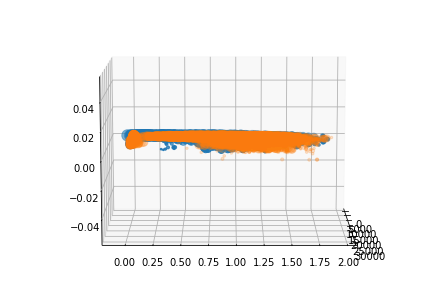

In [32]:
ind = ((y==4)|(y==1)|(y==2)|(y==3)|(y==6))
y_01 = y.copy()
y_01[ind] = 1
ind0 = y_01==0
ind1 = y_01==1
#plt.scatter(feature[ind0][:,42],feature[ind0][:,50])
#plt.scatter(feature[ind1][:,42],feature[ind1][:,50])
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
plt.scatter(feature[ind0][:,42], feature[ind0][:,93], feature[ind0][:,50],marker='o')
plt.scatter(feature[ind1][:,42], feature[ind1][:,93], feature[ind1][:,50],alpha=0.2,marker='o')
ax.view_init(elev=10,azim=0)

In [469]:
x.max(axis=1)

array([[3.1680887, 3.5473368, 2.833147 , ..., 3.5971007, 3.1422873,
        2.681295 ],
       [2.4164464, 3.5161357, 3.0189595, ..., 3.6359956, 3.178391 ,
        2.6736798],
       [2.4330943, 3.3934205, 3.1654563, ..., 4.4193835, 3.1375792,
        2.588877 ],
       ...,
       [4.342047 , 4.8141947, 3.2393596, ..., 4.987775 , 3.1128116,
        3.1066031],
       [4.7452106, 4.4620094, 3.304755 , ..., 4.9901853, 2.977572 ,
        3.0100384],
       [6.000379 , 4.358333 , 3.277154 , ..., 4.4818225, 2.9674785,
        3.0071075]], dtype=float32)

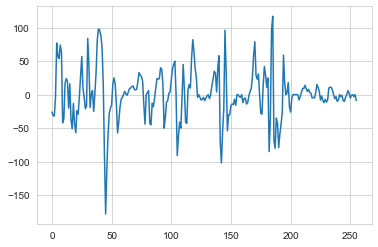

In [95]:
test=dp.compute_SSC(x,5)
#plt.figure(figsize=(32,24))
plt.plot(x[1000,:,2])
plt.grid(True)

In [4]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder

In [8]:
def train_model(model,feature,y,file):
    ind = ((y==4)|(y==1)|(y==2)|(y==3)|(y==6))
    y_01 = y.copy()
    y_01[ind] = 1
    x_full,x_test,y_full,y_test = train_test_split(feature,y_01,
                                                   test_size=0.2,
                                                   random_state=123,
                                                   shuffle=False)
    x_train,x_valid,y_train,y_valid = train_test_split(x_full,y_full,
                                                       test_size=0.2,
                                                       random_state=555,
                                                       shuffle=True)
    eval_set=[(x_train,y_train),(x_valid,y_valid)]
    model.fit(x_train, y_train,eval_metric=['error'],
              eval_set=eval_set,early_stopping_rounds=30)
    y_pred_t=model.predict(x_test)
    test = metrics.accuracy_score(y_test,y_pred_t)
    y_pred_v=model.predict(x_valid)
    valid = metrics.accuracy_score(y_valid,y_pred_v)
    y_pred_ta=model.predict(x_train)
    train = metrics.accuracy_score(y_train,y_pred_ta)
    print('test:%f'%test)
    print('valid:%f'%valid)
    print('train:%f'%train)
    model.save_model(file)
    return train,valid,test

def test_model(model,feature,y):
    ind = ((y==4)|(y==1)|(y==2)|(y==3)|(y==6))
    y_01 = y.copy()
    y_01[ind] = 1
    y_pred=model.predict(feature)
    test = metrics.accuracy_score(y_01,y_pred>0.5)
    print('acc:%f'%test)
    return test

In [136]:
lc = LabelEncoder()
#ind = ((y==1)|(y==2)|(y==3)|(y==6))
#y_01 = y[ind].copy()
y_01 = lc.fit_transform(y_01)
ind = ((y==4)|(y==1)|(y==2)|(y==3)|(y==6))
y_01 = y.copy()
y_01[ind] = 1
oh_ec = OneHotEncoder()
#y_oh = oh_ec.fit_transform(y_01[:,np.newaxis]).toarray()
x_full,x_test,y_full,y_test = train_test_split(feature,y_01,test_size=0.2,random_state=123,shuffle=False)
x_train,x_valid,y_train,y_valid = train_test_split(x_full,y_full,test_size=0.2,random_state=555,shuffle=False)
d_train = xgb.DMatrix(x_train,label=y_train)
d_valid = xgb.DMatrix(x_valid,label=y_valid)

In [21]:
param = {'max_depth': 5, 'eta': 0.3, 'gamma':0}
#param['nthread'] = 4
param['seed'] = 100
param['objective'] = 'binary:logistic'
#param['objectibe'] = 'multi:softmax'
#param['num_class'] = 4
param['lambda'] = 2
param['subsample'] = 0.8
evallist = [(d_train, 'train'), (d_valid, 'eval')]

model = xgb.train(param, d_train, 1000, evallist,early_stopping_rounds=30)
player.Beep(1000,200)

[0]	train-error:0.18021	eval-error:0.19251
Multiple eval metrics have been passed: 'eval-error' will be used for early stopping.

Will train until eval-error hasn't improved in 30 rounds.
[1]	train-error:0.14321	eval-error:0.15503
[2]	train-error:0.13292	eval-error:0.14563
[3]	train-error:0.13186	eval-error:0.14239
[4]	train-error:0.12069	eval-error:0.12858
[5]	train-error:0.11238	eval-error:0.12065
[6]	train-error:0.10618	eval-error:0.11477
[7]	train-error:0.10162	eval-error:0.11389
[8]	train-error:0.09879	eval-error:0.11109
[9]	train-error:0.09369	eval-error:0.10963
[10]	train-error:0.09148	eval-error:0.10727
[11]	train-error:0.08983	eval-error:0.10478
[12]	train-error:0.08803	eval-error:0.10213
[13]	train-error:0.08670	eval-error:0.10066
[14]	train-error:0.08457	eval-error:0.09772
[15]	train-error:0.08358	eval-error:0.09728
[16]	train-error:0.08145	eval-error:0.09478
[17]	train-error:0.07899	eval-error:0.09376
[18]	train-error:0.07719	eval-error:0.09361
[19]	train-error:0.07605	eval

[182]	train-error:0.00037	eval-error:0.03644
[183]	train-error:0.00037	eval-error:0.03615
[184]	train-error:0.00040	eval-error:0.03615
[185]	train-error:0.00037	eval-error:0.03600
[186]	train-error:0.00029	eval-error:0.03630
[187]	train-error:0.00018	eval-error:0.03630
[188]	train-error:0.00018	eval-error:0.03615
[189]	train-error:0.00015	eval-error:0.03556
[190]	train-error:0.00015	eval-error:0.03600
[191]	train-error:0.00015	eval-error:0.03542
[192]	train-error:0.00015	eval-error:0.03512
[193]	train-error:0.00015	eval-error:0.03630
[194]	train-error:0.00015	eval-error:0.03644
[195]	train-error:0.00011	eval-error:0.03512
[196]	train-error:0.00015	eval-error:0.03439
[197]	train-error:0.00011	eval-error:0.03527
[198]	train-error:0.00011	eval-error:0.03571
[199]	train-error:0.00007	eval-error:0.03527
[200]	train-error:0.00007	eval-error:0.03468
[201]	train-error:0.00007	eval-error:0.03483
[202]	train-error:0.00007	eval-error:0.03468
[203]	train-error:0.00007	eval-error:0.03497
[204]	trai

1

In [16]:
model = xgb.XGBClassifier(max_depth=4, 
                          learning_rate=0.3, 
                          n_estimators=1000, 
                          silent=True, 
                          eval_metrics='error',
                          objective='binary:logistic', 
                          #objective='multi:softmax',
                          #num_calss=4,
                          seed=100,
#                          nthread=4,
                          sub_sabsample=0.8,
                          reg_lambda = 15,
                         )
#eval_set=[(x_train,y_train),(x_valid,y_valid)]
#model.fit(x_train, y_train,eval_metric=['error'],
#          eval_set=eval_set,early_stopping_rounds=30)
#player.Beep(1000,200)

In [51]:
pd.Series(y).value_counts()

0    18906
2     7223
1     4278
6     3401
3      524
4       28
dtype: int64

In [17]:
acc={}
widths = [128,256]
#widths = [256]
for width in widths:
    stride = width//8
    file = './processed data/features_W%d_S%d.hdf5'%(width,stride)
    with h5py.File(file,'r') as f:
        feature = f['features'][...]
        y = f['labels'][...]
    model_file = './model/XGBoost_W%d_S%d.json'%(width,stride)
    train,valid,test = train_model(model,feature,y,model_file)
    acc['W%d'%width] = [train,valid,test]

[23:28:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { eval_metrics, silent, sub_sabsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-error:0.24087	validation_1-error:0.23958
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 30 rounds.
[1]	validation_0-error:0.20589	validation_1-error:0.20610
[2]	validation_0-error:0.19498	validation_1-error:0.19658
[3]	validation_0-error:0.18182	validation_1-error:0.18285
[4]	validation_0-error:0.16904	validation_1-error:0.17107
[5]	validation_0-error:0.16045	validation_1-error:0.16200
[6]	validation_0-error:0.15499	validation_1-error:0.15500
[7]	validation_0-err

[129]	validation_0-error:0.06714	validation_1-error:0.08113
[130]	validation_0-error:0.06676	validation_1-error:0.08064
[131]	validation_0-error:0.06656	validation_1-error:0.08047
[132]	validation_0-error:0.06627	validation_1-error:0.08002
[133]	validation_0-error:0.06603	validation_1-error:0.08020
[134]	validation_0-error:0.06563	validation_1-error:0.07931
[135]	validation_0-error:0.06527	validation_1-error:0.07909
[136]	validation_0-error:0.06479	validation_1-error:0.07905
[137]	validation_0-error:0.06452	validation_1-error:0.07914
[138]	validation_0-error:0.06455	validation_1-error:0.07918
[139]	validation_0-error:0.06403	validation_1-error:0.07874
[140]	validation_0-error:0.06375	validation_1-error:0.07861
[141]	validation_0-error:0.06359	validation_1-error:0.07852
[142]	validation_0-error:0.06328	validation_1-error:0.07852
[143]	validation_0-error:0.06303	validation_1-error:0.07830
[144]	validation_0-error:0.06285	validation_1-error:0.07821
[145]	validation_0-error:0.06269	validat

[266]	validation_0-error:0.04007	validation_1-error:0.06156
[267]	validation_0-error:0.03984	validation_1-error:0.06173
[268]	validation_0-error:0.03957	validation_1-error:0.06164
[269]	validation_0-error:0.03948	validation_1-error:0.06142
[270]	validation_0-error:0.03914	validation_1-error:0.06147
[271]	validation_0-error:0.03899	validation_1-error:0.06125
[272]	validation_0-error:0.03865	validation_1-error:0.06103
[273]	validation_0-error:0.03832	validation_1-error:0.06049
[274]	validation_0-error:0.03809	validation_1-error:0.06023
[275]	validation_0-error:0.03794	validation_1-error:0.06032
[276]	validation_0-error:0.03760	validation_1-error:0.06049
[277]	validation_0-error:0.03758	validation_1-error:0.06049
[278]	validation_0-error:0.03739	validation_1-error:0.06014
[279]	validation_0-error:0.03717	validation_1-error:0.05970
[280]	validation_0-error:0.03703	validation_1-error:0.05983
[281]	validation_0-error:0.03686	validation_1-error:0.05987
[282]	validation_0-error:0.03675	validat

[403]	validation_0-error:0.02232	validation_1-error:0.05062
[404]	validation_0-error:0.02228	validation_1-error:0.05040
[405]	validation_0-error:0.02208	validation_1-error:0.05044
[406]	validation_0-error:0.02211	validation_1-error:0.05066
[407]	validation_0-error:0.02192	validation_1-error:0.05062
[408]	validation_0-error:0.02182	validation_1-error:0.05053
[409]	validation_0-error:0.02171	validation_1-error:0.05044
[410]	validation_0-error:0.02156	validation_1-error:0.05031
[411]	validation_0-error:0.02148	validation_1-error:0.05040
[412]	validation_0-error:0.02139	validation_1-error:0.05031
[413]	validation_0-error:0.02115	validation_1-error:0.05026
[414]	validation_0-error:0.02111	validation_1-error:0.05013
[415]	validation_0-error:0.02095	validation_1-error:0.04995
[416]	validation_0-error:0.02090	validation_1-error:0.04986
[417]	validation_0-error:0.02092	validation_1-error:0.04969
[418]	validation_0-error:0.02074	validation_1-error:0.04951
[419]	validation_0-error:0.02076	validat

[540]	validation_0-error:0.01214	validation_1-error:0.04322
[541]	validation_0-error:0.01210	validation_1-error:0.04331
[542]	validation_0-error:0.01210	validation_1-error:0.04296
[543]	validation_0-error:0.01207	validation_1-error:0.04300
[544]	validation_0-error:0.01204	validation_1-error:0.04304
[545]	validation_0-error:0.01202	validation_1-error:0.04300
[546]	validation_0-error:0.01198	validation_1-error:0.04300
[547]	validation_0-error:0.01197	validation_1-error:0.04278
[548]	validation_0-error:0.01185	validation_1-error:0.04247
[549]	validation_0-error:0.01184	validation_1-error:0.04238
[550]	validation_0-error:0.01179	validation_1-error:0.04207
[551]	validation_0-error:0.01172	validation_1-error:0.04238
[552]	validation_0-error:0.01167	validation_1-error:0.04247
[553]	validation_0-error:0.01167	validation_1-error:0.04234
[554]	validation_0-error:0.01157	validation_1-error:0.04225
[555]	validation_0-error:0.01155	validation_1-error:0.04207
[556]	validation_0-error:0.01153	validat

[677]	validation_0-error:0.00658	validation_1-error:0.03764
[678]	validation_0-error:0.00655	validation_1-error:0.03778
[679]	validation_0-error:0.00653	validation_1-error:0.03782
[680]	validation_0-error:0.00656	validation_1-error:0.03791
[681]	validation_0-error:0.00660	validation_1-error:0.03773
[682]	validation_0-error:0.00659	validation_1-error:0.03778
[683]	validation_0-error:0.00654	validation_1-error:0.03791
[684]	validation_0-error:0.00653	validation_1-error:0.03786
[685]	validation_0-error:0.00656	validation_1-error:0.03786
[686]	validation_0-error:0.00650	validation_1-error:0.03791
[687]	validation_0-error:0.00642	validation_1-error:0.03773
[688]	validation_0-error:0.00637	validation_1-error:0.03760
[689]	validation_0-error:0.00631	validation_1-error:0.03764
[690]	validation_0-error:0.00621	validation_1-error:0.03773
[691]	validation_0-error:0.00619	validation_1-error:0.03760
[692]	validation_0-error:0.00616	validation_1-error:0.03769
[693]	validation_0-error:0.00613	validat

[814]	validation_0-error:0.00333	validation_1-error:0.03343
[815]	validation_0-error:0.00332	validation_1-error:0.03348
[816]	validation_0-error:0.00332	validation_1-error:0.03370
[817]	validation_0-error:0.00330	validation_1-error:0.03330
[818]	validation_0-error:0.00330	validation_1-error:0.03343
[819]	validation_0-error:0.00328	validation_1-error:0.03335
[820]	validation_0-error:0.00327	validation_1-error:0.03326
[821]	validation_0-error:0.00319	validation_1-error:0.03317
[822]	validation_0-error:0.00318	validation_1-error:0.03326
[823]	validation_0-error:0.00317	validation_1-error:0.03313
[824]	validation_0-error:0.00312	validation_1-error:0.03326
[825]	validation_0-error:0.00311	validation_1-error:0.03326
[826]	validation_0-error:0.00308	validation_1-error:0.03343
[827]	validation_0-error:0.00300	validation_1-error:0.03317
[828]	validation_0-error:0.00301	validation_1-error:0.03321
[829]	validation_0-error:0.00302	validation_1-error:0.03326
[830]	validation_0-error:0.00303	validat

[951]	validation_0-error:0.00148	validation_1-error:0.02994
[952]	validation_0-error:0.00144	validation_1-error:0.02998
[953]	validation_0-error:0.00144	validation_1-error:0.02989
[954]	validation_0-error:0.00145	validation_1-error:0.03002
[955]	validation_0-error:0.00142	validation_1-error:0.02985
[956]	validation_0-error:0.00142	validation_1-error:0.02985
[957]	validation_0-error:0.00142	validation_1-error:0.02989
[958]	validation_0-error:0.00139	validation_1-error:0.03002
[959]	validation_0-error:0.00139	validation_1-error:0.03007
[960]	validation_0-error:0.00138	validation_1-error:0.03007
[961]	validation_0-error:0.00134	validation_1-error:0.02994
[962]	validation_0-error:0.00137	validation_1-error:0.03002
[963]	validation_0-error:0.00136	validation_1-error:0.03007
[964]	validation_0-error:0.00136	validation_1-error:0.03007
[965]	validation_0-error:0.00135	validation_1-error:0.03002
[966]	validation_0-error:0.00133	validation_1-error:0.02985
[967]	validation_0-error:0.00129	validat

[79]	validation_0-error:0.05068	validation_1-error:0.07115
[80]	validation_0-error:0.05009	validation_1-error:0.07069
[81]	validation_0-error:0.04932	validation_1-error:0.06897
[82]	validation_0-error:0.04932	validation_1-error:0.06915
[83]	validation_0-error:0.04870	validation_1-error:0.06878
[84]	validation_0-error:0.04829	validation_1-error:0.06888
[85]	validation_0-error:0.04793	validation_1-error:0.06824
[86]	validation_0-error:0.04736	validation_1-error:0.06742
[87]	validation_0-error:0.04677	validation_1-error:0.06751
[88]	validation_0-error:0.04656	validation_1-error:0.06724
[89]	validation_0-error:0.04604	validation_1-error:0.06614
[90]	validation_0-error:0.04538	validation_1-error:0.06578
[91]	validation_0-error:0.04525	validation_1-error:0.06460
[92]	validation_0-error:0.04497	validation_1-error:0.06451
[93]	validation_0-error:0.04440	validation_1-error:0.06378
[94]	validation_0-error:0.04402	validation_1-error:0.06351
[95]	validation_0-error:0.04388	validation_1-error:0.063

[216]	validation_0-error:0.01536	validation_1-error:0.04058
[217]	validation_0-error:0.01540	validation_1-error:0.04049
[218]	validation_0-error:0.01515	validation_1-error:0.04012
[219]	validation_0-error:0.01508	validation_1-error:0.04031
[220]	validation_0-error:0.01481	validation_1-error:0.04012
[221]	validation_0-error:0.01458	validation_1-error:0.03958
[222]	validation_0-error:0.01463	validation_1-error:0.03940
[223]	validation_0-error:0.01426	validation_1-error:0.03949
[224]	validation_0-error:0.01426	validation_1-error:0.03940
[225]	validation_0-error:0.01406	validation_1-error:0.03885
[226]	validation_0-error:0.01397	validation_1-error:0.03876
[227]	validation_0-error:0.01376	validation_1-error:0.03830
[228]	validation_0-error:0.01365	validation_1-error:0.03821
[229]	validation_0-error:0.01344	validation_1-error:0.03812
[230]	validation_0-error:0.01347	validation_1-error:0.03776
[231]	validation_0-error:0.01328	validation_1-error:0.03794
[232]	validation_0-error:0.01294	validat

[353]	validation_0-error:0.00318	validation_1-error:0.02930
[354]	validation_0-error:0.00318	validation_1-error:0.02911
[355]	validation_0-error:0.00318	validation_1-error:0.02930
[356]	validation_0-error:0.00318	validation_1-error:0.02921
[357]	validation_0-error:0.00300	validation_1-error:0.02930
[358]	validation_0-error:0.00298	validation_1-error:0.02921
[359]	validation_0-error:0.00291	validation_1-error:0.02911
[360]	validation_0-error:0.00289	validation_1-error:0.02930
[361]	validation_0-error:0.00287	validation_1-error:0.02911
[362]	validation_0-error:0.00282	validation_1-error:0.02884
[363]	validation_0-error:0.00273	validation_1-error:0.02866
[364]	validation_0-error:0.00264	validation_1-error:0.02866
[365]	validation_0-error:0.00259	validation_1-error:0.02857
[366]	validation_0-error:0.00257	validation_1-error:0.02866
[367]	validation_0-error:0.00255	validation_1-error:0.02848
[368]	validation_0-error:0.00252	validation_1-error:0.02857
[369]	validation_0-error:0.00250	validat

In [43]:
feature.shape

(34360, 168)

In [18]:
pd.DataFrame(acc,index=['train','valid','text']).to_csv('./results/Acc_W%d_S%d.csv'%(width,stride))

In [23]:
some_of_rest = ['P940_MSham_B_Walking_trial_6_emg.csv',
                'P940_M050_B_Walking_trial_4_emg.csv',
                'P812_M100_A_Walking_trial_3_emg.csv',
                'P645_M050_A_Walking_trial_3_emg.csv',
                'P623_Msham_B_Walking_trial_2_emg.csv',
                'P551_M50_B_Walking_trial_6_emg.csv']
booster = xgb.Booster()
booster.load_model('./model/XGBoost_W256_S64.json')
model = xgb.XGBClassifier()
model._Booster = booster
acc = []
for file in some_of_rest:
    path = './data/正常/'+file
    feature2,y2 = dp.pipeline_feature(path,width=256,stride=64,scaler=False,
                        threshold_WAMP=threshold_WAMP,
                        threshold_ZC=threshold_ZC,
                        threshold_SSC=threshold_SSC,
                        bins=bins,
                        ranges=HIST_range,
                        show_para=False)
    acc += [test_model(model,feature2,y2)]
print(acc)

acc:0.985207
acc:0.967262
acc:0.893443
acc:0.881657
acc:0.973166
acc:0.912536
[0.985207100591716, 0.9672619047619048, 0.8934426229508197, 0.8816568047337278, 0.9731663685152058, 0.9125364431486881]


In [22]:
stride

32

In [62]:
model = xgb.XGBClassifier()
booster = xgb.Booster()
booster.load_model(fname='./model/XGBoost_W256_S128.json')
model._Booster = booster
model.predict(feature)

E:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:902: UserWarning: Label encoder is not defined.  Returning class probability.
  'Label encoder is not defined.  Returning class probability.')


array([0.00029847, 0.00084651, 0.00094539, ..., 0.00023954, 0.00014745,
       0.00029812], dtype=float32)

In [178]:
y_pred=model.predict(feature)
#rest=metrics.accuracy_score(y_01,y_pred>0.5)

In [181]:
#y_pred_a = model.predict(feature)
c_m=metrics.confusion_matrix(y_test,y_pred_t)
c_m
#metrics.precision_recall_curve(y_valid,y_pred)
#(y_valid==0).sum()

array([[8652,  635],
       [   0,    0]], dtype=int64)

In [191]:
ind = ((y_test==1)|(y_test==2)|(y_test==3)|(y_test==4)|(y_test==6))
#ind = ((y2==1)|(y2==2)|(y2==3)|(y2==4)|(y2==6))
y_01 = y_test
y_01[ind] = 1
#d_test = xgb.DMatrix(feature2,label=y_01)

In [172]:
y_pred=model.predict(feature2)
P940 = metrics.accuracy_score(y2,y_pred)
print(P940)

0.9183673469387755


In [19]:
feature[41872:].shape
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

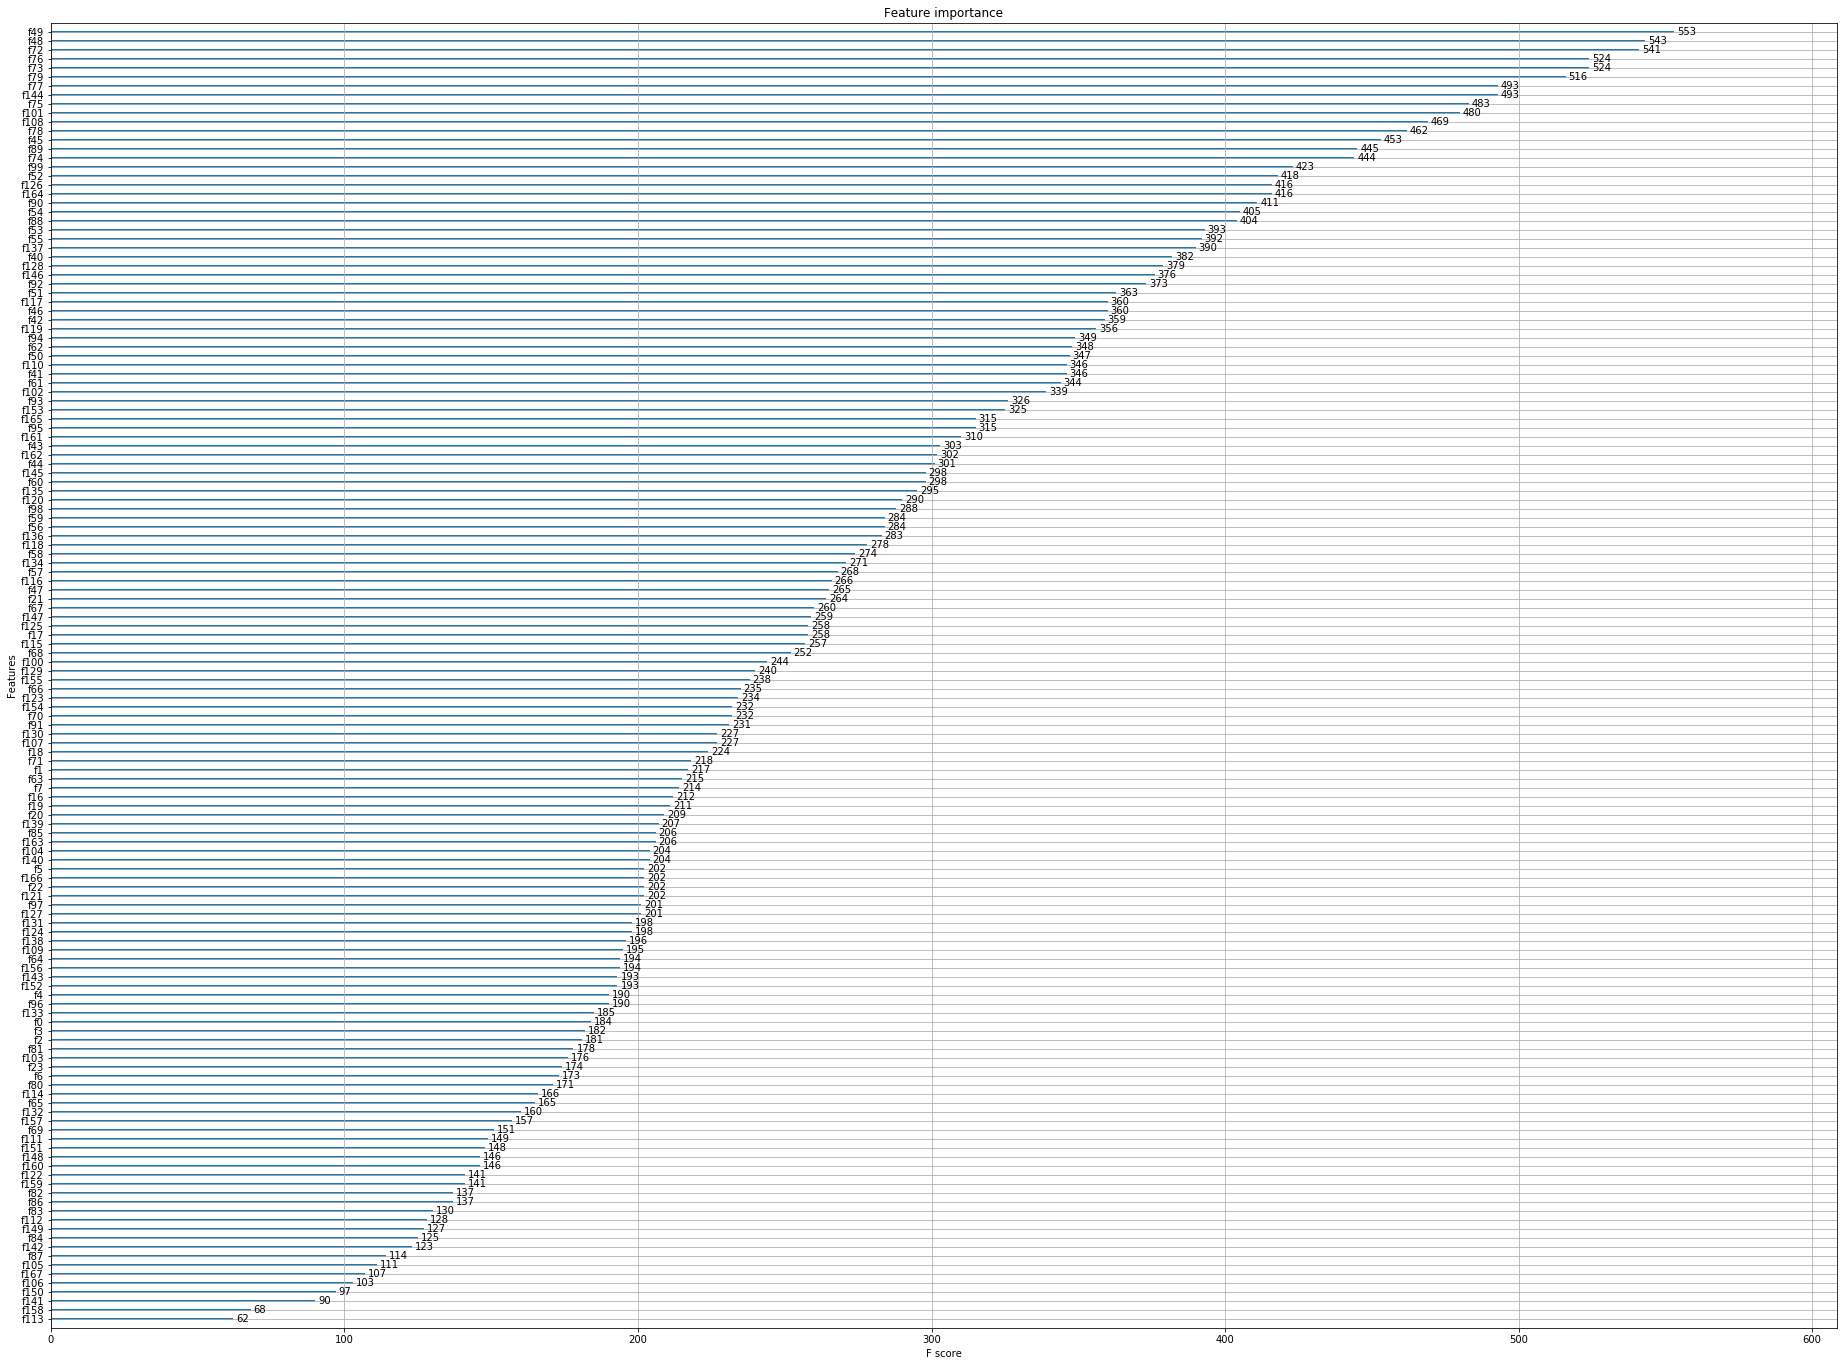

In [21]:
plt.rcParams["figure.figsize"] = (32,24)
plot_importance(model)
plt.show()

In [593]:
y_02[200]

1

(array([  5.,  16., 202.,  32.,   1.]),
 array([-5., -3., -1.,  1.,  3.,  5.], dtype=float32),
 <a list of 5 Patch objects>)

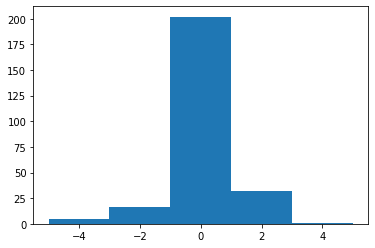

In [648]:
plt.hist(x[1000,:,1],bins=bins,range=HIST_range)

In [7]:
feature.mean(axis=1)

array([1820.74390164, 1794.98282657, 1366.77049128, ..., 3368.58514734,
       3150.73227432, 2575.55319812])

In [139]:
y_pred_ta=model.predict(x_train)
train = metrics.accuracy_score(y_train,y_pred_ta)

Text(0.5, 1.0, 'accuracy with all patitents(not whole data)')

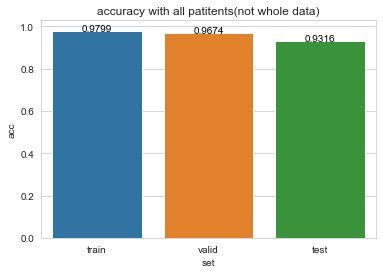

In [140]:
sns.set_style('whitegrid')
acc = pd.Series([train,valid,test])
set_ = pd.Series(['train','valid','test'])
df = pd.DataFrame({'set':set_,'acc':acc})
plt.figure(figsize=(6,4))
g=sns.barplot(x='set',y='acc',data=df)
for index,row in df.iterrows():
    g.text(row.name,row.acc,round(row.acc,4),color='black', ha="center")
    #print(row)
plt.title('accuracy with all patitents(not whole data)')

In [357]:
df_cm=pd.DataFrame(c_m,index=['actual_N','actual_P'],columns=['predict_N','predict_P'])

In [358]:
df_cm

,predict_N,predict_P
actual_N,143422,320
actual_P,186,30715


In [144]:
acc = {'1':P940}

In [173]:
acc['6']=P940

In [174]:
df = pd.DataFrame({'set':list(acc.keys()),'acc':list(acc.values())})

In [175]:
df

,set,acc
0,1,0.989645
1,2,0.956845
2,3,0.907104
3,4,0.892399
4,5,0.964222
5,6,0.918367


Text(0.5, 1.0, 'accuracy on some of rest dataset')

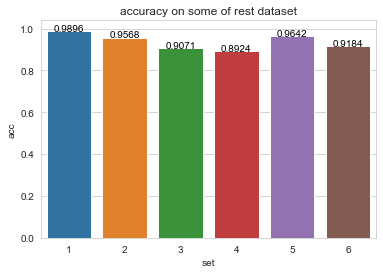

In [176]:
plt.figure(figsize=(6,4))
g=sns.barplot(x='set',y='acc',data=df)
for index,row in df.iterrows():
    g.text(row.name,row.acc,round(row.acc,4),color='black', ha="center")
    #print(row)
plt.title('accuracy on some of rest dataset')

In [320]:
list(acc.values())

[1.0,
 0.9959677419354839,
 0.9950920245398773,
 0.9472913616398243,
 0.9685792349726776]

In [ ]:
y_01